# **Task 2 (Linear Regression)**
----

### **Background of the task:**
#### **After understanding the data and defining the features and label column We note :**

* The data type for the Label column is Numeric Data So we Build a Regression model.
*  the label column has real-valued Data so we build a Linear Regression Model.
* We Have More Than One feature on the data to build a multi Linear Regression Model. 





# **Data Manipulation**
---

## **Importing important libraries like :**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

## **Loading the Data**




**Dataset Link :** [Seoul Bike Sharing Demand](https://https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#)

**Reading the Data from Google Drive with `read_csv` command**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ML/SeoulBikeData.csv", encoding= 'unicode_escape')
df.head(5)

Mounted at /content/drive


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### **Modify The Date**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
def split_date(df):
  df['Year'] = df["Date"].apply(lambda t:t.year)
  df['Month'] = df["Date"].apply(lambda t:t.month)
  df['Day'] = df["Date"].apply(lambda t:t.day)
  df = df.drop(['Date'], axis=1)
  return df

In [ ]:
df = split_date(df)
df.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


#### **Convert All Data To Numerical Type**


In [ ]:
numerical = df.drop(['Seasons', 'Holiday', 'Functioning Day','Year'], axis = 1)
numerical.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12


In [ ]:
categorical = df.filter(['Seasons', 'Holiday', 'Functioning Day'])
categorical.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [ ]:
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


### **Final Data**

In [ ]:
data = pd.concat([numerical, cat_numerical], axis = 1)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,0,0,1,1,1


#### **correlation matrix**

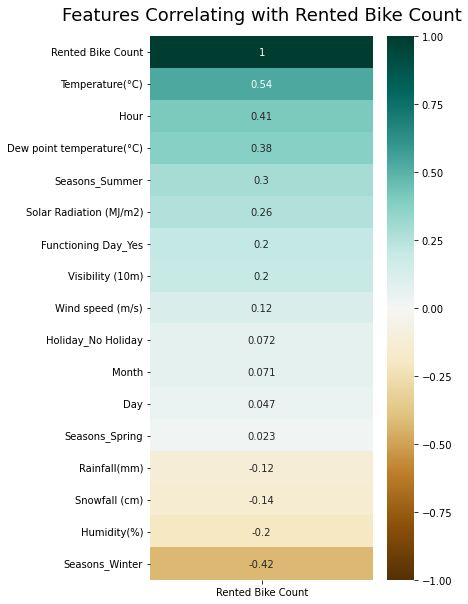

In [ ]:
corrMatrix = data.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

### **Regarding correlation:**

*  Values closer to 1 show a high correlation, and values closer to 0 show the 
lowest correlation.

* A positive correlation value shows that the variables are positively correlated..
* A negative correlation value shows that the variables are negatively correlated.

### **Plot The Columns That Have a Negative Correlation with the labeled column**

[Text(0.5, 1.0, 'Relation between Seasons_Winter and users')]

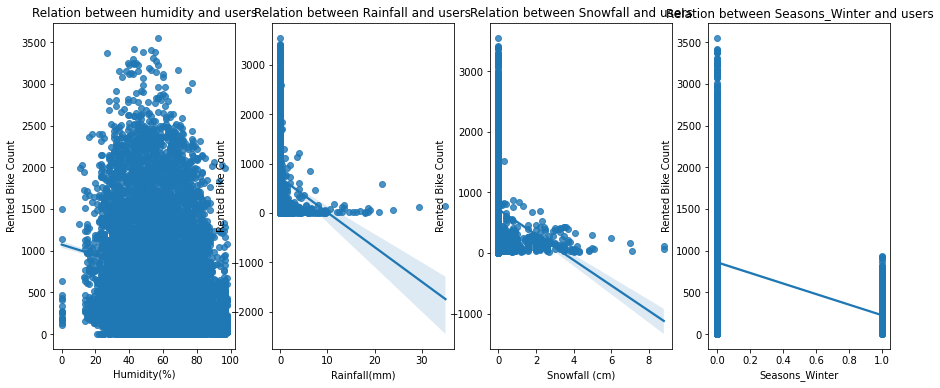

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(15,6))
sns.regplot(x=data['Humidity(%)'],y=data['Rented Bike Count'],ax=ax1)
ax1.set(title='Relation between humidity and users')
sns.regplot(x=data['Rainfall(mm)'],y=data['Rented Bike Count'],ax=ax2)
ax2.set(title='Relation between Rainfall and users')
sns.regplot(x=data['Snowfall (cm)'],y=data['Rented Bike Count'],ax=ax3)
ax3.set(title='Relation between Snowfall and users')
sns.regplot(x=data['Seasons_Winter'],y=data['Rented Bike Count'],ax=ax4)
ax4.set(title='Relation between Seasons_Winter and users')

#**Building Linear Regression**

## **Before Removing Outliers**
-----

### **1) Build Linear regression model (with highest correlation)**

#### **Before Dimensionality Reduction (PCA & LDA)**

In [ ]:
X = data[['Hour','Temperature(°C)','Dew point temperature(°C)','Seasons_Summer','Solar Radiation (MJ/m2)']]
Y = data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Standardize data
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

##### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 31.97%
Model MSE : 28471335.12%
Cross Val Accuracy: 33.48 %
Cross Val Standard Deviation: 1.65 %


###### **Evaluation Matrix**

In [ ]:
from sklearn import metrics
import numpy as np
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 419.7005247069656
Mean Squared Error: 284713.351188527
Root Mean Squared Error: 533.5853738517642


###### **plot the error**

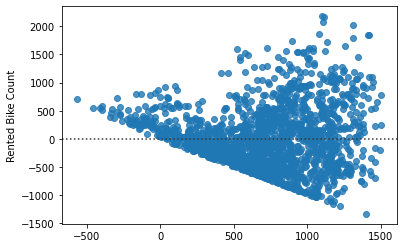

In [ ]:
sns.residplot(x=y_pred, y=y_test, data=data)  
plt.show()

#### **After Dimensionality Reduction (PCA & LDA)**

##### **With PCA**

In [ ]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_train) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3','P4','P5'] 
X_PCA_test = pca.transform(X_test)
X_PCA_val = pca.transform(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_principal, y_train)
y_pred = regressor.predict(X_PCA_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_principal, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 31.97%
Model MSE : 28471335.12%
Cross Val Accuracy: 33.48 %
Cross Val Standard Deviation: 1.65 %


###### **Evaluation Matrix**

In [ ]:
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 419.7005247069656
Mean Squared Error: 284713.351188527
Root Mean Squared Error: 533.5853738517642


##### **With LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=5, solver='svd')
X_lda = lda.fit_transform(X_train, y_train)
X_lda = pd.DataFrame(X_lda) 
X_lda.columns = ['P1', 'P2', 'P3','P4','P5']
X_Ida_test = pca.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_lda, y_train)
y_pred = regressor.predict(X_Ida_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_lda, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : -2.35%
Model MSE : 42836124.03%
Cross Val Accuracy: 33.48 %
Cross Val Standard Deviation: 1.65 %


###### **Evaluation Matrix**

In [ ]:
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 524.4865051714498
Mean Squared Error: 428361.2403121587
Root Mean Squared Error: 654.4931170853966


#### **Observations:**
* There is a high error rate when using the most closely related columns with the Target column.
* The results without using Dimensional Reduction are better than the results after using it.
* PCA gives better results than LDA.

### **2) Build Linear regression model ( with Positive correlation Columns)**

#### **Before Dimensionality Reduction (PCA & LDA)**

In [ ]:
X = data.drop(columns=['Rented Bike Count','Snowfall (cm)','Rainfall(mm)','Humidity(%)','Seasons_Winter'])
Y = data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Standardize data
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

##### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_val, y = y_val, cv = 6)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 50.33%
Model MSE : 20786285.30%
Cross Val Accuracy: 52.97 %
Cross Val Standard Deviation: 4.63 %


###### **Evaluation Matrix**

In [ ]:
from sklearn import metrics
import numpy as np
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 351.3040851542571
Mean Squared Error: 207862.85297945217
Root Mean Squared Error: 455.9197878788024


###### **plot the error**

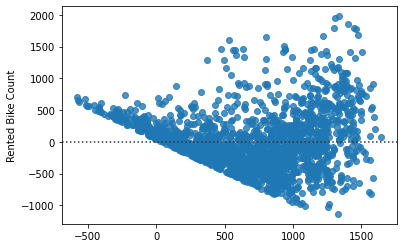

In [ ]:
sns.residplot(x=y_pred, y=y_test, data=data)  
plt.show()

#### **After Dimensionality Reduction (PCA & LDA)**

##### **With PCA**

In [ ]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_train) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3','P4','P5'] 
X_PCA_test = pca.transform(X_test)
X_PCA_val = pca.transform(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_principal, y_train)
y_pred = regressor.predict(X_PCA_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_principal, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 20.53%
Model MSE : 33261869.40%
Cross Val Accuracy: 23.19 %
Cross Val Standard Deviation: 2.22 %


###### **Evaluation Matrix**

In [ ]:
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 440.87074741595046
Mean Squared Error: 332618.69400736137
Root Mean Squared Error: 576.7310413072643


##### **With LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=5, solver='svd')
X_lda = lda.fit_transform(X_train, y_train)
X_lda = pd.DataFrame(X_lda) 
X_lda.columns = ['P1', 'P2', 'P3','P4','P5']
X_Ida_test = pca.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_lda, y_train)
y_pred = regressor.predict(X_Ida_test)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_lda, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 3.15%
Model MSE : 40534232.84%
Cross Val Accuracy: 49.73 %
Cross Val Standard Deviation: 1.71 %


###### **Evaluation Matrix**

In [ ]:
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 512.3217169679239
Mean Squared Error: 405342.3284469492
Root Mean Squared Error: 636.6650048863603


#### **Observations:**
* There is a high error rate when using columns that have positive correlation values with the target column, but the error rate is less than the error rate resulting from using the highest correlation columns .
* The results without using Dimensional Reduction are better than the results after using it.
* PCA gives better results than IDA. 

### **3) Build Linear regression model (  with All Columns)** 

#### **Before Dimensionality Reduction (PCA & LDA)**

In [ ]:
X = data.drop(columns=['Rented Bike Count'])
Y = data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Standardize data
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

##### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_val, y = y_val, cv = 6)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 54.30%
Model MSE : 19126566.20%
Cross Val Accuracy: 55.26 %
Cross Val Standard Deviation: 5.03 %


###### **Evaluation Matrix**

In [ ]:
from sklearn import metrics
import numpy as np
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 334.69097774429395
Mean Squared Error: 191265.66202195283
Root Mean Squared Error: 437.3392985108391


###### **plot the error**

<ipython-input-54-4f9301f38d9d>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


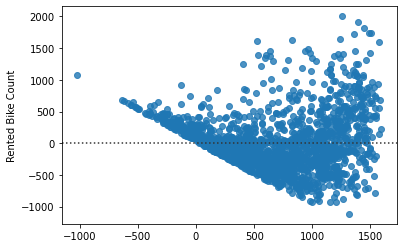

In [ ]:
sns.residplot(x=y_pred, y=y_test, data=data)  
ax = plt.axes()
ax.set_facecolor("white")
plt.show()

<ipython-input-55-48b437072b07>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(2000, 1500, ' R^2 is 0.543\n Adj R^2 is 0.53878\n RMSE is: 437.3393')

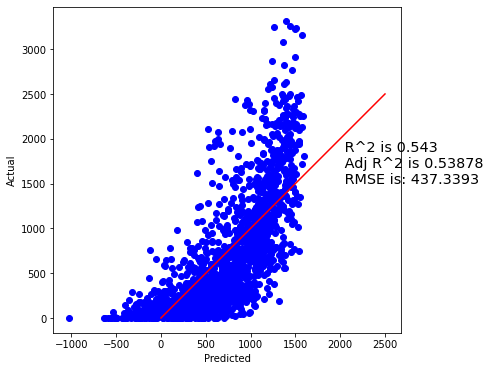

In [ ]:
plt.figure(figsize=(10,6))
x = np.linspace(0,2500,100)
y = np.linspace(0,2500,100)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax = plt.axes()
ax.set_facecolor("white")
overlay=(f' R^2 is {round(model.score(X_test,y_test),5)}\n Adj R^2 is {round(1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),5)}\n RMSE is: {round(mean_squared_error(y_test,y_pred,squared=False),5)}')
plt.annotate(s=overlay,xy=(2000,1500),size='x-large')

#### **After Dimensionality Reduction (PCA & LDA)**

##### **With PCA**

In [ ]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_train) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3','P4','P5'] 
X_PCA_test = pca.transform(X_test)
X_PCA_val = pca.transform(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_principal, y_train)
y_pred = regressor.predict(X_PCA_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_PCA_val, y = y_val, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 34.11%
Model MSE : 27577262.18%
Cross Val Accuracy: 41.66 %
Cross Val Standard Deviation: 4.09 %


###### **Evaluation Matrix**

In [ ]:
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 389.56265004728874
Mean Squared Error: 275772.6217891192
Root Mean Squared Error: 525.1405733602377


##### **With LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=5, solver='svd')
X_lda = lda.fit_transform(X_train, y_train)
X_lda = pd.DataFrame(X_lda) 
X_lda.columns = ['P1', 'P2', 'P3','P4','P5']
X_Ida_test = pca.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_lda, y_train)
y_pred = regressor.predict(X_Ida_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : -2.09%
Model MSE : 42725825.13%
Cross Val Accuracy: 54.01 %
Cross Val Standard Deviation: 1.39 %


###### **Evaluation Matrix**

In [ ]:
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 528.3119868009943
Mean Squared Error: 427258.25126922363
Root Mean Squared Error: 653.6499455130579


## **Observations:**
* There is a high error rate when using all columns, but the error rate is less than the error rate resulting from using the highest correlation columns & all positive correlations.
* The results without using Dimensional Reduction are better than the results after using it.
* PCA gives better results than IDA.
* When looking at the data values again, we notice that there are outliers, so we will try to build a model after removing the outliers.

## **After Removing Outliers**
-----

### **Data modification**

**Plot Rented Bike Count**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


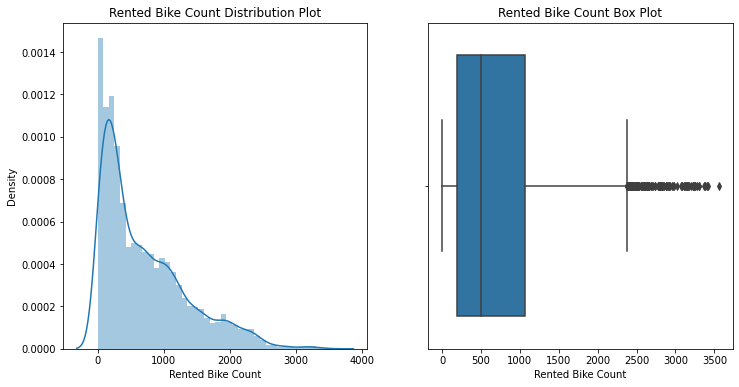

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Rented Bike Count Distribution Plot')
sns.distplot(data['Rented Bike Count'])
plt.subplot(1,2,2)
plt.title('Rented Bike Count Box Plot')
sns.boxplot(x=data['Rented Bike Count'])
plt.show()

**Remove Outliers**

Samples in train set with outliers: 8760
Samples in train set without outliers: 8602


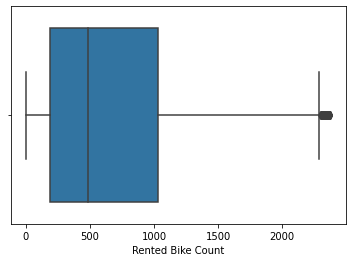

In [ ]:
print("Samples in train set with outliers: {}".format(len(data)))
q1 = data['Rented Bike Count'].quantile(0.25)
q3 = data['Rented Bike Count'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
final_data = data.loc[(data['Rented Bike Count'] >= lower_bound) & (data['Rented Bike Count'] <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(final_data)))
sns.boxplot(x="Rented Bike Count", data=final_data)

### **Building Linear Regression**

#### **build the model**

In [ ]:
X=final_data.drop(['Rented Bike Count'],axis=1)
y=final_data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)

In [ ]:
model = LinearRegression()
regressor = model.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#### **Performance Measures for Regression**


###### **Cross Validation with K-Fold**

In [ ]:
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MAE : {metrics.mean_absolute_error(y_test, y_pred):.2f}")
accuracies = cross_val_score(estimator = model, X = X_val, y = y_val, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 60.83%
Model MAE : 272.59
Cross Val Accuracy: 57.12 %
Cross Val Standard Deviation: 4.79 %


###### **Evaluation Matrix**

In [ ]:
print (f'Mean Absolute Error:  {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print (f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print (f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')


Mean Absolute Error:  272.59
Mean Squared Error: 131851.63
Root Mean Squared Error: 363.11


**Interpretation of R2 score:
 R2 = 0.61**
* It can be referred that 61% of the variability of the dependent output attribute can be explained by the model while the remaining 39% of the variability is still unaccounted for.
* R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.

##### **the standard error**

In [ ]:
print(f'the standard error = {(((y_pred.mean() - y_test.mean()) / y_test.mean()) * 100):.2f}%')

the standard error = 0.54%


#### **Scatter plot predicted vs. actual**

<ipython-input-24-48b437072b07>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(2000, 1500, ' R^2 is 0.60829\n Adj R^2 is 0.60461\n RMSE is: 363.1138')

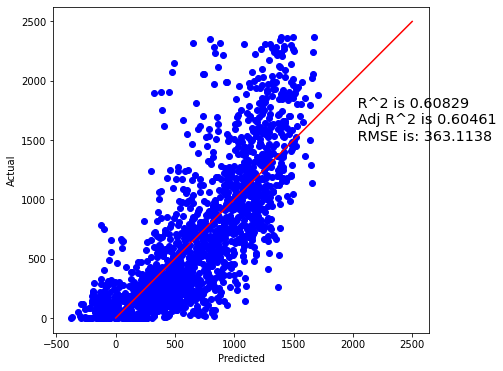

In [ ]:
plt.figure(figsize=(10,6))
x = np.linspace(0,2500,100)
y = np.linspace(0,2500,100)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax = plt.axes()
ax.set_facecolor("white")
overlay=(f' R^2 is {round(model.score(X_test,y_test),5)}\n Adj R^2 is {round(1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),5)}\n RMSE is: {round(mean_squared_error(y_test,y_pred,squared=False),5)}')
plt.annotate(s=overlay,xy=(2000,1500),size='x-large')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

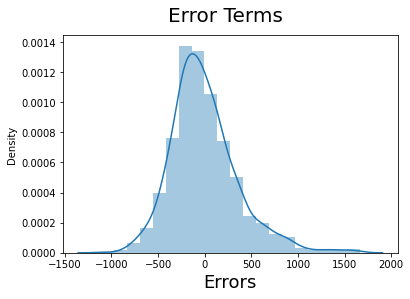

In [ ]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## **Lasso Regression**
-----

In [ ]:
X=final_data.drop(['Rented Bike Count'],axis=1)
y=final_data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print (f'Mean Absolute Error:  {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print (f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print (f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')

Mean Absolute Error:  272.70
Mean Squared Error: 131853.18
Root Mean Squared Error: 363.12


In [ ]:
accuracies = cross_val_score(estimator = lasso, X = X_val, y = y_val, cv = 5)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MAE : {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 60.83%
Model MAE : 272.70
Cross Val Accuracy: 57.27 %
Cross Val Standard Deviation: 4.85 %


## **Ridge Regression**
-----

In [ ]:
X=final_data.drop(['Rented Bike Count'],axis=1)
y=final_data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
  
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('R^2: %.3f' % r2_score(y_test, y_pred))
print (f'Mean Absolute Error:  {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print (f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print (f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')

R^2: 0.608
Mean Absolute Error:  272.57
Mean Squared Error: 131851.75
Root Mean Squared Error: 363.11


###### **Cross Validation with K-Fold**

In [ ]:
accuracies = cross_val_score(estimator = ridge, X = X_val, y = y_val, cv = 5)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MAE : {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 60.83%
Model MAE : 272.57
Cross Val Accuracy: 57.36 %
Cross Val Standard Deviation: 4.86 %


# **Conclusion :**
* All Features are important in the process of building the model: When creating the model from all the features, the Error is less than the Error resulting from taking a certain number of Features.
* PCA with 5 components much better than PCA with 3 components.
* Accordingly, the PCA & IDA process increases the error rate compared to without the process.
* The reason that LDA technique gave bad results that it separates or discriminates (hence the name LDA) training instances by their classes and there is no clear classes in this dataset.
* There are many outliers which can affect the value of the error.
* The lowest value of the error (MAE) was 272 when all the features were taken and the outliers were removed.
* All Models have R-Square equal to 61% that well the dependent variable explains the variance of the independent variable
* When calculating the standard error approximately using the equation We show that the error rate of the model befor removing outliers equal to 3.5%
and After removing outliers equal to 0.81%.



In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score","Mean Absolute Error"]
models = [
LinearRegression(),
Lasso(alpha=0.1),
Ridge(alpha=0.1),
]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  score = model.score(X_test, y_test)
  mae = mean_absolute_error(y_test,y_pred)
  table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f'),format(mae, '.2f')])
print(table)

+------------------+--------------------+----------+---------------------+
|      Model       | Mean Squared Error | R² score | Mean Absolute Error |
+------------------+--------------------+----------+---------------------+
| LinearRegression |     131851.63      |   0.61   |        272.59       |
|      Lasso       |     131853.18      |   0.61   |        272.70       |
|      Ridge       |     131851.75      |   0.61   |        272.57       |
+------------------+--------------------+----------+---------------------+


## **Normlize The Target Column**

In [ ]:
X=final_data.drop(['Rented Bike Count'],axis=1)
y=final_data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)


In [ ]:
print(y_train.min(),y_train.max())

0 2375


In [ ]:

# Standardize data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)
y_train = normalize(np.array(y_train).reshape(-1,1))

In [ ]:
model = LinearRegression()
regressor = model.fit(X_train, y_train)
# y_pred = (regressor.predict(X_test))* 2375 
y_pred = (regressor.predict(X_test))

In [ ]:
"""
print(f"Model R-Square : {r2_score(y_test, y_pred)*100:.2f}%")
print(f"Model MAE : {metrics.mean_absolute_error(y_test, y_pred):.2f}")
accuracies = cross_val_score(estimator = model, X = X_val, y = y_val, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

"""
print(f"Model R-Square : {r2_score(normalize(np.array(y_test).reshape(-1,1)), y_pred)*100:.2f}%")
print(f"Model MAE : {metrics.mean_absolute_error(normalize(np.array(y_test).reshape(-1,1)), y_pred):.2f}")
accuracies = cross_val_score(estimator = model, X = X_val, y = normalize(np.array(y_val).reshape(-1,1)), cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 99.54%
Model MAE : 0.01
Cross Val Accuracy: 99.40 %
Cross Val Standard Deviation: 0.37 %


In [ ]:
"""
print (f'Mean Absolute Error:  {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print (f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print (f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
"""
print (f'Mean Absolute Error:  {metrics.mean_absolute_error(normalize(np.array(y_test).reshape(-1,1)), y_pred):.2f}')
print (f'Mean Squared Error: {metrics.mean_squared_error(normalize(np.array(y_test).reshape(-1,1)), y_pred):.2f}')
print (f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(normalize(np.array(y_test).reshape(-1,1)), y_pred)):.2f}')

Mean Absolute Error:  0.01
Mean Squared Error: 0.00
Root Mean Squared Error: 0.01


In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score","Mean Absolute Error"]
models = [
LinearRegression(),
Lasso(alpha=0.1),
Ridge(alpha=.1),
]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(normalize(np.array(y_test).reshape(-1,1)), y_pred)
  score = model.score(X_test, normalize(np.array(y_test).reshape(-1,1)))
  mae = mean_absolute_error(normalize(np.array(y_test).reshape(-1,1)),y_pred)
  table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f'),format(mae, '.2f')])
print(table)

+------------------+--------------------+----------+---------------------+
|      Model       | Mean Squared Error | R² score | Mean Absolute Error |
+------------------+--------------------+----------+---------------------+
| LinearRegression |        0.00        |   1.00   |         0.01        |
|      Lasso       |        0.04        |  -0.00   |         0.07        |
|      Ridge       |        0.00        |   1.00   |         0.01        |
+------------------+--------------------+----------+---------------------+
